<a href="https://colab.research.google.com/github/fzanart/Socialz/blob/main/anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')
import json

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
df = pd.read_csv('/content/drive/MyDrive/Socialz/cobol_pullrequests.csv')
df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{""action"":""closed"",""number"":3,""pull_request"":{...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{""action"":""opened"",""number"":3,""pull_request"":{...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{""action"":""closed"",""number"":4,""pull_request"":{...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{""action"":""opened"",""number"":4,""pull_request"":{...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{""action"":""closed"",""number"":8,""pull_request"":{...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{""action"":""closed"",""number"":115,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{""action"":""closed"",""number"":127,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{""action"":""opened"",""number"":127,""pull_request""...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{""action"":""closed"",""number"":128,""pull_request""...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1


In [5]:
def text_lenght(text):

    if text == None:

        return 0
    else:

        return len(text)

df['payload'] = df['payload'].apply(json.loads)
df['merged'] = df['payload'].apply(lambda x: x.get('pull_request').get('merged'))
df['comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('comments'))
df['review_comments'] = df['payload'].apply(lambda x: x.get('pull_request').get('review_comments'))
df['title lenght'] = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('title')))
df['body lenght'] = df['payload'].apply(lambda x: text_lenght(x.get('pull_request').get('body')))
df['total LOC'] = df['additions'] + df['deletions']

In [6]:
df

,type,login,name,created_at,payload,lang,event,user_login,user_type,url,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght,total LOC
0,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:38:18 UTC,"{'action': 'closed', 'number': 3, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0,4
1,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:28:12 UTC,"{'action': 'opened', 'number': 3, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/3""",1,2,2,1,False,0,0,15,0,4
2,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 16:19:54 UTC,"{'action': 'closed', 'number': 4, 'pull_reques...","""COBOL""","""closed""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,True,0,0,12,83,34
3,PullRequestEvent,vim-sroberge,vimaec/g3d,2021-06-16 15:37:56 UTC,"{'action': 'opened', 'number': 4, 'pull_reques...","""COBOL""","""opened""","""vim-sroberge""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/4""",1,23,11,1,False,0,0,12,83,34
4,PullRequestEvent,mavimaec,vimaec/g3d,2021-11-19 20:40:52 UTC,"{'action': 'closed', 'number': 8, 'pull_reques...","""COBOL""","""closed""","""mavimaec""","""User""","""https://api.github.com/repos/vimaec/g3d/pulls/8""",2,113,702,16,True,0,0,15,0,815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-05-14 03:43:29 UTC,"{'action': 'closed', 'number': 115, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,688,1,39,True,0,0,75,155,689
1329,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-06 17:56:00 UTC,"{'action': 'closed', 'number': 127, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,True,0,1,65,114,506
1330,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-11-30 22:12:33 UTC,"{'action': 'opened', 'number': 127, 'pull_requ...","""COBOL""","""opened""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,506,0,15,False,0,0,65,0,506
1331,PullRequestEvent,joe-tingsanchali-sonarsource,SonarSource/sonar-scanning-examples,2021-12-09 04:01:35 UTC,"{'action': 'closed', 'number': 128, 'pull_requ...","""COBOL""","""closed""","""joe-tingsanchali-sonarsource""","""User""","""https://api.github.com/repos/SonarSource/sona...",1,5,1,1,True,0,0,52,1092,6


In [9]:
df.columns

Index(['type', 'login', 'name', 'created_at', 'payload', 'lang', 'event',
       'user_login', 'user_type', 'url', 'commits', 'additions', 'deletions',
       'changed_files', 'merged', 'comments', 'review_comments',
       'title lenght', 'body lenght', 'total LOC'],
      dtype='object')

In [10]:
X_train = df[df['merged'] == True]
X_train = X_train[['commits', 'additions', 'deletions','changed_files', 'merged', 'comments', 'review_comments','title lenght', 'body lenght', 'total LOC']]
X_train

,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght,total LOC
2,1,23,11,1,True,0,0,12,83,34
4,2,113,702,16,True,0,0,15,0,815
6,1,254,2137823,696,True,0,0,42,157,2138077
9,1,8,2,3,True,0,0,29,148,10
11,6,1412,117,13,True,0,0,8,0,1529
...,...,...,...,...,...,...,...,...,...,...
1319,1,1,1,1,True,0,0,33,0,2
1321,2,0,0,0,True,0,0,24,40,0
1328,1,688,1,39,True,0,0,75,155,689
1329,1,506,0,15,True,0,1,65,114,506


In [11]:
X_test = df[df['merged'] == False]
X_test = X_test[['commits', 'additions', 'deletions','changed_files', 'merged', 'comments', 'review_comments','title lenght', 'body lenght', 'total LOC']]
X_test

,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght,total LOC
0,1,2,2,1,False,0,0,15,0,4
1,1,2,2,1,False,0,0,15,0,4
3,1,23,11,1,False,0,0,12,83,34
5,2,113,702,16,False,0,0,15,0,815
7,1,254,2137823,696,False,0,0,42,157,2138077
...,...,...,...,...,...,...,...,...,...,...
1325,3,685,0,38,False,0,0,49,0,685
1326,3,685,0,38,False,0,0,49,0,685
1327,1,688,1,39,False,0,0,76,145,689
1330,1,506,0,15,False,0,0,65,0,506


In [12]:
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [47]:
clf = IsolationForest(max_samples='auto', n_jobs=-1, random_state=42)
clf.fit(X_train)
y_pred_train = clf.fit_predict(X_train)
y_pred_test = clf.decision_function(X_test)



In [48]:
len(y_pred_test)

781

decision_function(X)

Average anomaly score of X of the base classifiers.

The anomaly score of an input sample is computed as the mean anomaly score of the trees in the forest.

In [49]:
y_pred_test[y_pred_test<0]

array([-0.27733853, -0.1784419 , -0.13161236, -0.13161236, -0.06938633,
       -0.06952348, -0.14828002, -0.21561647, -0.00158712, -0.20016181,
       -0.18224165, -0.06373326, -0.03730635, -0.00353859, -0.0389154 ,
       -0.07472073, -0.13998374, -0.13998374, -0.11699215, -0.31299086,
       -0.11093525, -0.11173035, -0.06625729, -0.00688389, -0.22777313,
       -0.01526435, -0.06282887, -0.06282887, -0.06282887, -0.04015882,
       -0.06282887, -0.06282887, -0.04015882, -0.04015882, -0.06282887,
       -0.01219494, -0.06282887, -0.04015882, -0.04015882, -0.06282887,
       -0.00206073, -0.04015882, -0.06282887, -0.04015882, -0.03561907,
       -0.06282887, -0.04015882, -0.19948547, -0.2010258 , -0.02105239,
       -0.02105239])

In [50]:
# Predict returns -1 for outliers and 1 for inliers.
y_pred_test = clf.predict(X_test)
anomaly = np.concatenate([y_pred_train,y_pred_test])
X_train['Data'] = 1
X_test['Data'] = 0
data = pd.concat([X_train, X_test])
data['Anomaly'] = anomaly
data

,commits,additions,deletions,changed_files,merged,comments,review_comments,title lenght,body lenght,total LOC,Data,Anomaly
2,1,23,11,1,True,0,0,12,83,34,1,1
4,2,113,702,16,True,0,0,15,0,815,1,1
6,1,254,2137823,696,True,0,0,42,157,2138077,1,-1
9,1,8,2,3,True,0,0,29,148,10,1,1
11,6,1412,117,13,True,0,0,8,0,1529,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1325,3,685,0,38,False,0,0,49,0,685,0,1
1326,3,685,0,38,False,0,0,49,0,685,0,1
1327,1,688,1,39,False,0,0,76,145,689,0,1
1330,1,506,0,15,False,0,0,65,0,506,0,1


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


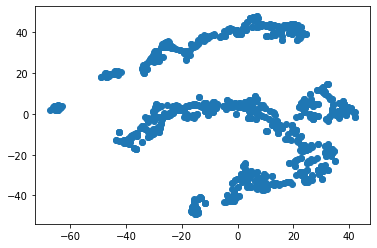

In [51]:
from sklearn.manifold import TSNE

features = ['commits', 'additions', 'deletions','changed_files', 'merged', 'comments', 'review_comments','title lenght', 'body lenght', 'total LOC']

tsne = TSNE(n_components=2, random_state=0)
projections = tsne.fit_transform(data[features])

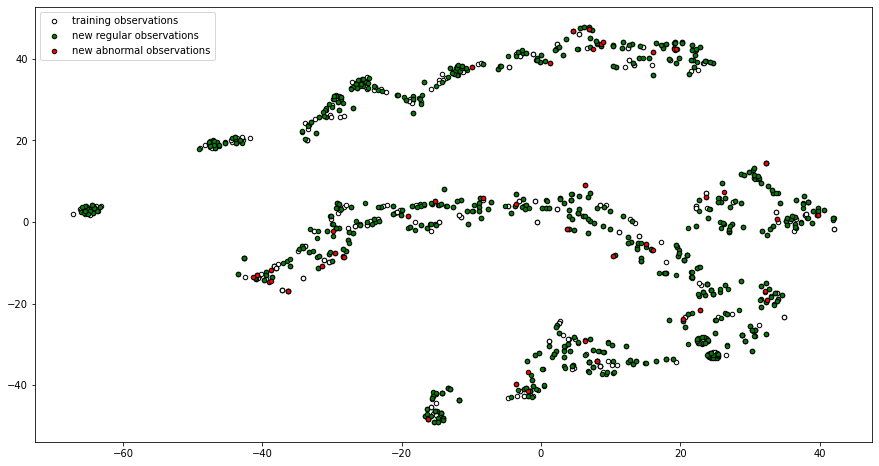

In [70]:
plt.figure(figsize=(15,8))
indices_a = data[data['Data'] == 1].index.to_list() # Select training observations
indices_b = data[(data['Data'] == 0) & (data['Anomaly'] == 1)].index.to_list() # Select new regular observations
indices_c = data[(data['Data'] == 0) & (data['Anomaly'] == -1)].index.to_list() # Select new abnormal observations
a = plt.scatter(np.take(projections[:,0], indices_a), np.take(projections[:,1], indices_a) , c="white", s=20, edgecolor="k")
b = plt.scatter(np.take(projections[:,0], indices_b), np.take(projections[:,1], indices_b) , c="green", s=20, edgecolor="k")
c = plt.scatter(np.take(projections[:,0], indices_c), np.take(projections[:,1], indices_c) , c="red", s=20, edgecolor="k")
plt.legend(
    [a, b, c],
    ["training observations", "new regular observations", "new abnormal observations"],
    loc="upper left")


plt.show()